In [8]:
import numpy as np
import cv2 as cv
from io import BytesIO
import PIL
from IPython.display import clear_output, Image as NoteImage, display
import matplotlib.pyplot as plt


In [156]:
import pandas as pd

In [157]:
df = pd.read_csv("/Users/mohammadahmad/Desktop/rasabot/rasa-chat-bot/src/olabot/resources/state_subsidy.csv")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   43 non-null     object
 1   S1      43 non-null     int64 
 2   S1_Pro  43 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [168]:
ad = df[df["State"] == "DELHI"].reset_index()

In [172]:
ad["S1_Pro"][0]

19850

In [9]:
def gray(im):
    return cv.cvtColor(im, cv.COLOR_BGR2GRAY)
def plot_row(grayim,index):
    y = grayim[index,:]
    x = np.arange(len(y))
    plt.plot(x,y)
    plt.show()

In [138]:
# %matplotlib notebook
# def imshowOne(im,fmt='jpeg'):
#     #a = np.uint8(np.clip(im, 0, 255))
#     f = BytesIO()
#     PIL.Image.fromarray(im).save(f, fmt)
#     display(NoteImage(data=f.getvalue()))
# def imsave(im,filename,fmt='jpeg'):
#     #a = np.uint8(np.clip(im, 0, 255))
#     PIL.Image.fromarray(im).save(filename, fmt)
# def imread(filename):
#     img = cv.imread(filename)
#     img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#     return img
def imshowOne(img, gray=False):
    if gray:
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    else:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
def imshowMultiple(images, gray=False):
    f, axarr = plt.subplots(1, len(images), figsize=(14, 14)) 
    axarr[0].title.set_text(images[0][0])
    if gray:
        axarr[0].imshow(images[0][1], cmap='gray')
        axarr[0].axis('off')
    else:
        axarr[0].imshow(images[0][1])
        axarr[0].axis('off')
    for i,d in enumerate(images):  
        if i !=0 : 
            axarr[i].title.set_text(d[0])
            if gray:
                axarr[i].imshow(d[1], cmap='gray')
                axarr[i].axis('off')
            else:
                axarr[i].imshow(d[1])
                axarr[i].axis('off')
                
def plot_3d(arr):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    w, h = arr.shape
    Y = np.arange(1, w+1)
    X = np.arange(1, h+1)
    X, Y = np.meshgrid(X, Y)
    Z = arr
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
    
def plot_images(imgs, index=None):
    rows = len(imgs)
    f, axes = plt.subplots(nrows=rows, ncols=1)
    for i, img in enumerate(imgs):
        y = img[1][index or 0, :]
        x = np.arange(len(y))
        axes[i].set_title(img[0], color='r', rotation='vertical',x=-0.1,y=-0.001)
        axes[i].plot(x,y)

In [11]:
lisa = cv.imread("./images/pic1.png")
lisa = cv.cvtColor(lisa, cv.COLOR_BGR2RGB)

Normal


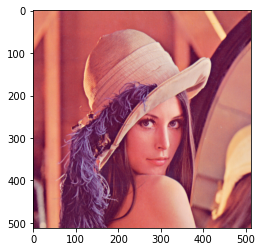

In [12]:
print ("Normal")
imshowOne(lisa)

Additave Inverse


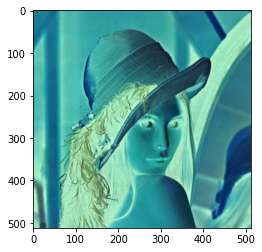

In [6]:
print ("Additave Inverse")
imshowOne(255-lisa)

In [101]:
factor = 0.7
mlLisa = np.uint8(lisa*factor)
# imshow(mlLisa)
imshowMultiple([["Original", lisa], ["Multiply lisa with 0.7", mlLisa]])

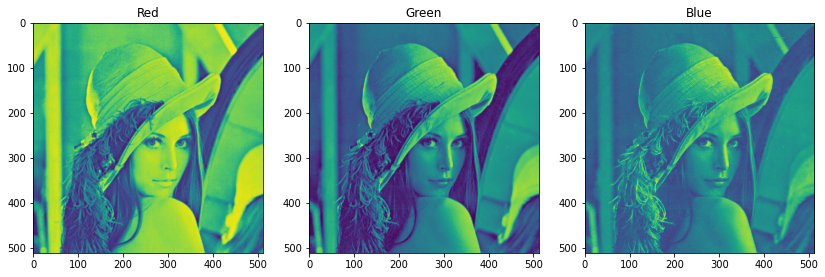

In [26]:
lisaRed = lisa[:,:,0]
lisaGreen = lisa[:,:,1]
lisaBlue = lisa[:,:,2]
imgList = [
    ["Red", lisaRed],
    ["Green", lisaGreen],
    ["Blue", lisaBlue]
]
imshowMultiple(imgList)

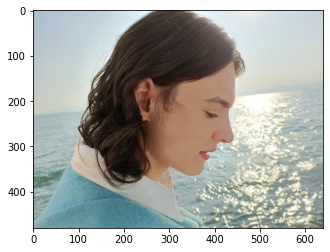

In [30]:
mona = cv.imread("pic.png")
mona = cv.cvtColor(mona, cv.COLOR_BGR2RGB)
imshowOne(mona)

In [31]:
print(f"mona image size {mona.shape}")

print(f"Lisa image size {lisa.shape}")

mona image size (480, 640, 3)
Lisa image size (512, 512, 3)


In [32]:
ball = lisa[280:340, 330:390]
lisa[273:333, 100:160] = ball

In [33]:
newMona = cv.resize(mona, (lisa.shape[0],lisa.shape[1]))

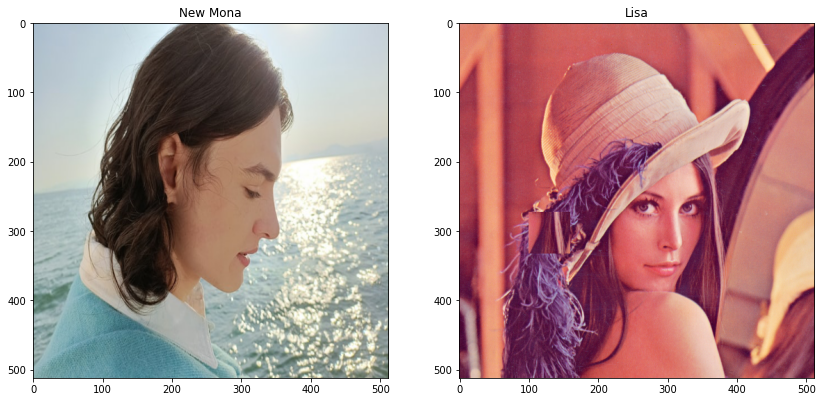

In [34]:
imgList = [
    ["New Mona", newMona],
    ["Lisa", lisa]
]
imshowMultiple(imgList)

Average Image


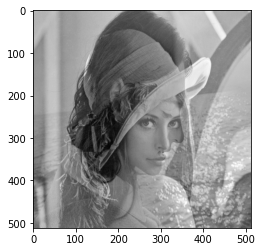

In [35]:
print("Average Image")
factor = 0.5
monaLisa = np.uint8(np.clip(gray(newMona)*factor, 0, 255))+np.clip(gray(lisa)*factor, 0, 255)
imshowOne(monaLisa, True)
# plt.imshow(monaLisa, cmap='gray')

# Noise

## Gaussian Noise

In [133]:
def gaussianNoise(img,mu,sigma):
    noise = np.random.normal(mu, sigma, img.shape)
    return np.uint8(img + noise)

Gaussian noise


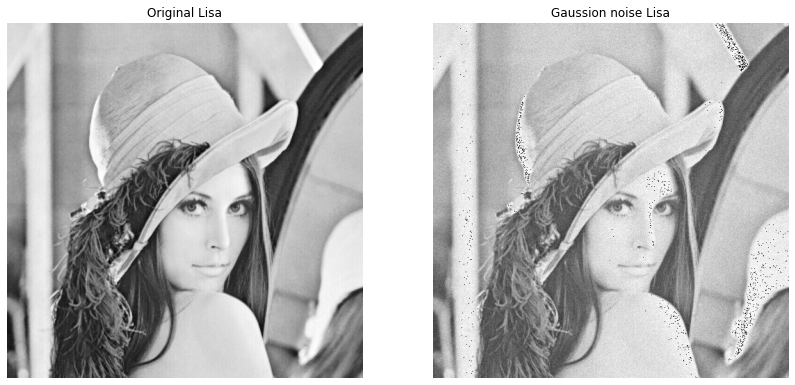

In [136]:
print("Gaussian noise")
gausi = gaussianNoise(lisa[:,:,0],0,8)
# plt.imshow(gausi, cmap='gray')
imgList = [
    ["Original Lisa", lisa[:,:,0]],
    ["Gaussion noise Lisa", gausi]
]
imshowMultiple(imgList, True)

In [38]:
def gaussian_filter_(shape, sigma):
    x, y, ch = [edge //2 for edge in shape]
#     grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in range(-x, x+1)] for j in range(-y, y+1)])

    grid = []
    for i in range(-x, x):
        row = []
        for j in range(-y, y):
            row.append(((i**2+j**2)/(2.0*sigma**2)))
        grid.append(row)
    
    g_filter = np.exp(-np.array(grid))/(2*np.pi*sigma**2)
    g_filter /= np.sum(g_filter)
    return g_filter

2-D plot of Gaussian Filter


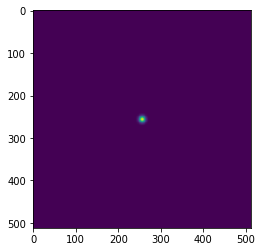

In [54]:
gaussia_filter = gaussian_filter_(lisa[:,:].shape, 5)
import matplotlib.pyplot as plt
print("2-D plot of Gaussian Filter")
plt.imshow(gaussia_filter, interpolation='none')
plt.show()

3-D plot of Gaussian Filter


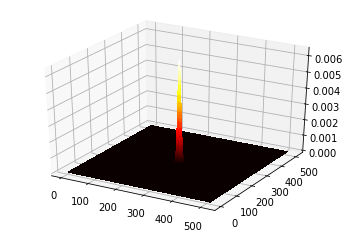

In [55]:
print("3-D plot of Gaussian Filter")
plot_3d(gaussia_filter)

Gaussian noise


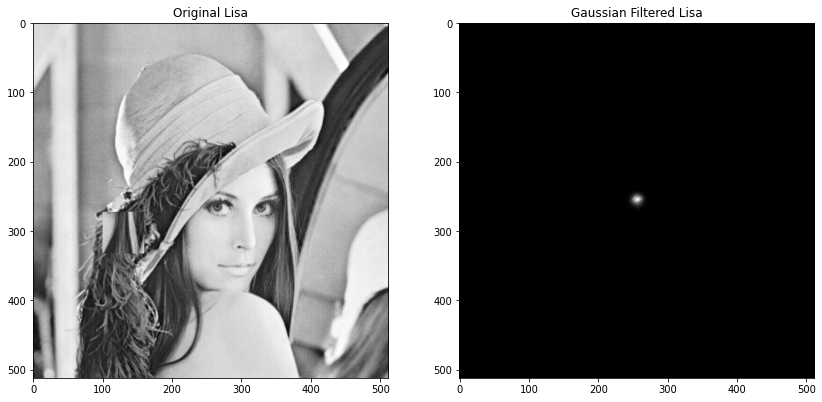

In [130]:
print("Gaussian noise")
gaussianFilteredLisa = gaussia_filter*lisa[:,:,0]
# plt.imshow(gausi, cmap='gray')
imgList = [
    ["Original Lisa", lisa[:,:,0]],
    ["Gaussian Filtered Lisa", gaussianFilteredLisa]
]
imshowMultiple(imgList, True)

Original 3D plot of Lisa


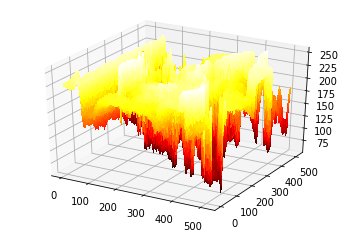

In [57]:
print("Original 3D plot of Lisa")
plot_3d(lisa[:,:, 0])

In [58]:
print("3D plot of Lisa after multiplying with Gaussian filter")
plot_3d(gaussianFilteredLisa[:,:])

3D plot of Lisa after multiplying with Gaussian filter


## Gaussina Blur

In [44]:
## Source - https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=(
            (kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            kernel_w // 2),(0,0)), mode='constant', 
            constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=(
            (kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

In [45]:
def GaussianBlurImage(image, gausianFilter):
    #image = imread(image)
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gausianFilter)
    return (im_filtered.astype(np.uint8))

In [59]:
%%time
gLisa = GaussianBlurImage(lisa, gaussia_filter)

CPU times: user 6min 30s, sys: 3.78 s, total: 6min 34s
Wall time: 6min 38s


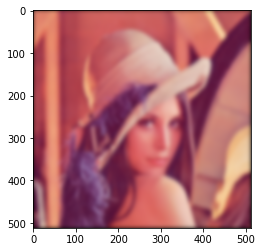

In [60]:
imshowOne(gLisa, True)

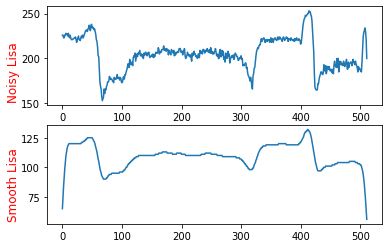

In [125]:
imgList = [
    ["Noisy Lisa", lisa[:,:,0]],
    ["Smooth Lisa", gLisa[:,:,0]]
]
plot_images(imgList)

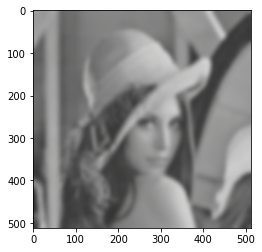

In [48]:
from scipy.ndimage import gaussian_filter
blurred = gaussian_filter(lisa, sigma=5)
imshowOne(blurred, True)

In [131]:
imgList = [
    ["Original ", lisa[:,:,0]],
    ["Noisy ", gausi],
    ["Blurred  ", blurred[:,:,0]]
]
plot_images(imgList)

## Salt and pepper Noise

In [13]:
def add_salt_and_pepper(gb, prob):
    '''Adds "Salt & Pepper" noise to an image.
    gb: should be one-channel image with pixels in [0, 1] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return np.uint8(noisy*255)

In [15]:
saltyLisa = add_salt_and_pepper(lisa/255.0,0.1)
imshowOne(gray(saltyLisa), True)

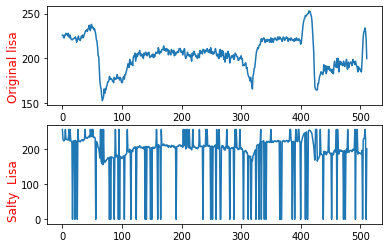

In [16]:
imgList = [
    ["Original lisa", lisa[:,:,0]],
    ["Salty  Lisa", saltyLisa[:,:,0]]
]
plot_images(imgList)

# Filters

In [41]:
print(plt.get_fignums())

[]


In [18]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [84]:
lisa100 = saltyLisa[100,0:100]
cleaned = moving_average(lisa100,5)

With salt and pepper noise


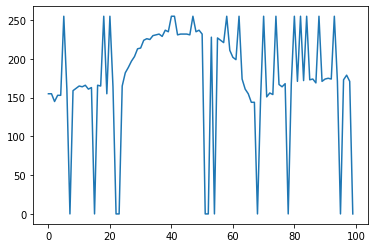

In [85]:
print("With salt and pepper noise")
plt.plot(np.arange(len(saltyLisa[100,0:100,0])),saltyLisa[100,0:100,0])

After averaging out salt and pepper noise.


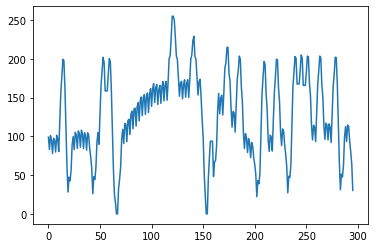

In [86]:
print("After averaging out salt and pepper noise.")
plt.plot(np.arange(len(cleaned)),cleaned)

In [87]:
def weighted_moving_average(a,weights=np.array([1,4,6,4,1])):
    s = sum(weights)
    n = len(weights)
    h = n//2
    ret = [np.dot(a[i-h:i+h+1],weights)//s for i in range(h,len(a)-h)]
    return ret

In [88]:
w_cleaned = weighted_moving_average(saltyLisa[100,0:100,0])

In [89]:
print("After averaging out using weighted moving average salt and pepper noise.")
plt.plot(np.arange(len(w_cleaned)),w_cleaned)

After averaging out using weighted moving average salt and pepper noise.


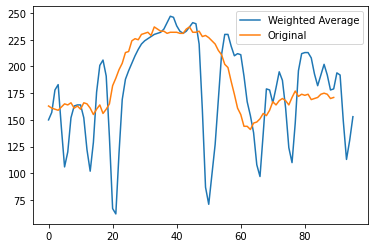

In [90]:
plt.plot(np.arange(len(w_cleaned)),w_cleaned,label="Weighted Average")
#plt.plot(np.arange(len(cleaned[5:-5])),cleaned[5:-5],label="Average")
plt.plot(np.arange(len(lisa[100,0:100,0][5:-5])),lisa[100,0:100,0][5:-5],label="Original")
plt.legend()

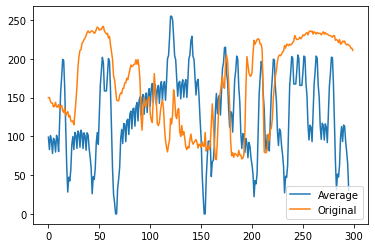

In [93]:
plt.plot(np.arange(len(cleaned)),cleaned,label="Average")
plt.plot(np.arange(len(lisa[300,0:300,0])),lisa[300,0:300,0],label="Original")
plt.legend()

## Convolution ans correlation

In [94]:
from scipy.ndimage import convolve, correlate

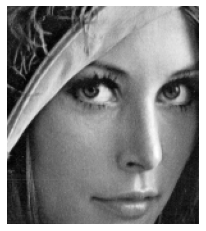

In [140]:
lisaFace = gray(lisa[200:370, 200:350])
imshowOne(lisaFace, True)

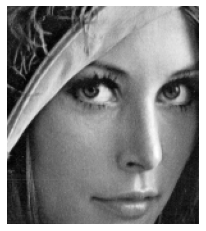

In [139]:
# no change
f1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
filtered = convolve(lisaFace, f1, mode='constant')
imshowOne(filtered, True)

In [143]:
# Shifted, Notice the very black line at the begining and the end of the
# the last two images for convolution and correlation respectively
f2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
conv = convolve(lisaFace, f2, mode='constant')
corr = correlate(lisaFace, f2, mode='constant')
# imshowOne(lisaFace)
# imshowOne(conv)
# imshowOne(corr)

imgList = [
    ["Original lisa", lisaFace],
    ["Conv Lisa ( black line Left )", conv],
    ["Corr Lisa ( black line Right )", corr]
]
imshowMultiple(imgList, True)

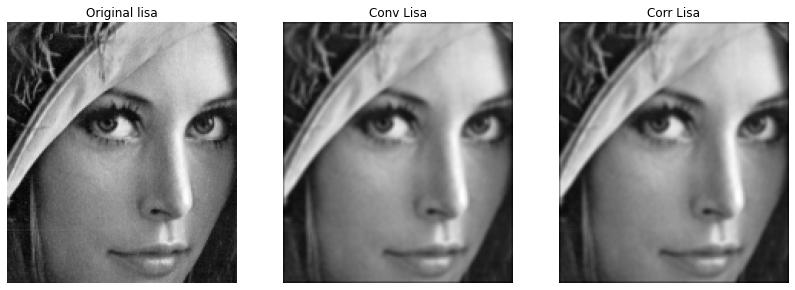

In [150]:
# Blur (with a box filter)
f3 = 1.0/9.0*np.ones((3,3))
conv = convolve(lisaFace, f3, mode='constant')
corr = correlate(lisaFace, f3, mode='constant')
imgList = [
    ["Original lisa", lisaFace],
    ["Conv Lisa", conv],
    ["Corr Lisa", corr]
]
imshowMultiple(imgList, True)

In [149]:
if conv.all() == corr.all():
    print("With symetric filter correlation and convolution are same.")

With symetric filter correlation and convolution are same.


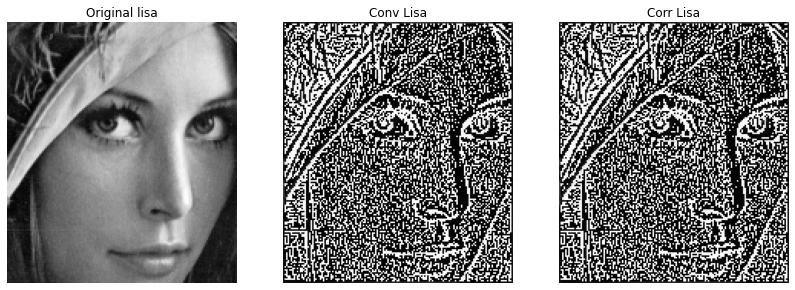

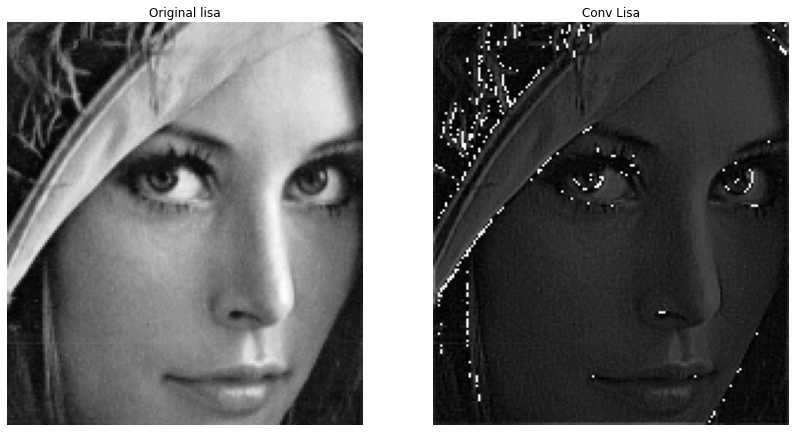

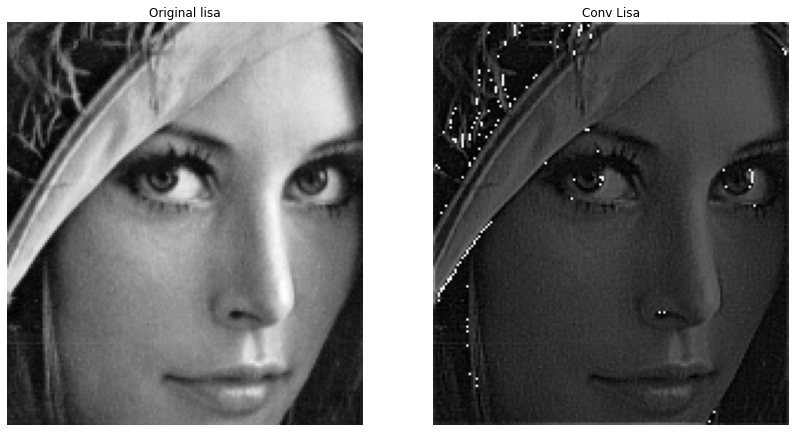

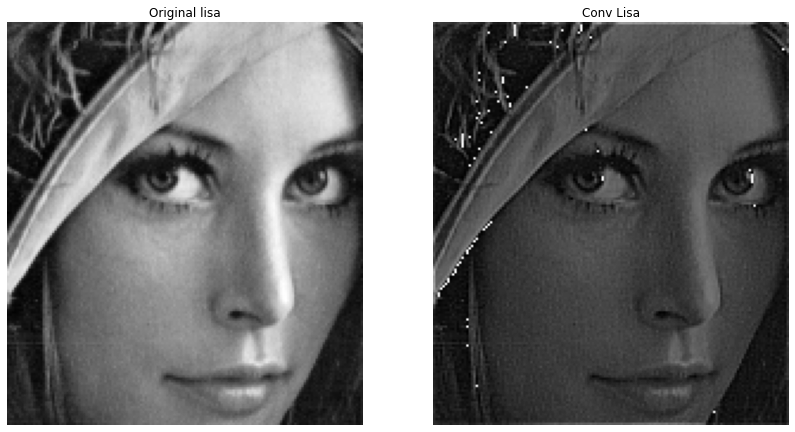

In [155]:
# twise the impulse - blur >>> Sharpening filter 
# Accentuates difference with local average
f4 = np.array([[0,0,0],[0,1,0],[0,0,0]]) - 1.0/9.0*np.ones((3,3))
conv = convolve(lisaFace, f4, mode='constant')
corr = correlate(lisaFace, f4, mode='constant')
imgList = [
    ["Original lisa", lisaFace],
    ["Conv Lisa", conv],
    ["Corr Lisa", corr]
]
imshowMultiple(imgList, True)
for i in range(5):
    f4 += np.array([[0,0,0],[0,0.1,0],[0,0,0]])
    conv = convolve(lisaFace, f4, mode='constant') 
    #imsave(conv,"%d.jpg" % i)
    imgList = [
    ["Original lisa", lisaFace],
    ["Conv Lisa", conv]
    ]
    imshowMultiple(imgList, True)